### Лабораторная работа №3 "Ансамбли моделей на примере решающих деревьев"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')

In [2]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
encoding = {"Sex": {"M": 1, "F": 0},
            "ChestPainType": {"ASY": 0, "ATA": 1, "NAP": 2, "TA": 3},
            "RestingECG": {"LVH": 0, "Normal": 1, "ST": 2},
            "ExerciseAngina": {"N": 0, "Y": 1},
            "ST_Slope": {"Down": 0, "Flat": 1, "Up": 2}}
df_enc = df.replace(encoding)
df_enc

/var/folders/1f/qzsxtjvd1hgcnxb8nykmnbz00000gn/T/ipykernel_40354/1978302751.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_enc = df.replace(encoding)


Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

**1.** Разбить выборку на две части (train, test)

In [4]:
def normalization(X):
    return (X - X.mean()) / X.std()

In [5]:
from sklearn.model_selection import train_test_split

X = normalization(df_enc.drop("HeartDisease", axis=1))
Y = df_enc.HeartDisease
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

**2.** С помощью простого решающего дерева (см. класс sklearn.tree.DecisionTreeClassifier()). Обучить модель, не задавая ограничения на глубину решающего дерева, оценить точность обучения и тестирования (здесь в качестве точности использовать долю верных ответов). Сравнить точность на обучающей и тестовой выборке, что можно сказать о модели?

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

print(f"Train accuracy: {round(accuracy_score(Y_train, Y_train_pred), 3)}, Test accuracy: {round(accuracy_score(Y_test, Y_test_pred), 3)}")

Train accuracy: 1.0, Test accuracy: 0.786


**3.** C помощью класса sklearn.model_selection.GridSearchCV() выполнить оптимизацию решающего дерева по гиперпараметрам: 
* 'max_depth': [3,4,5,6,7,8,9,10,None],
* 'max_features':  ['auto', 'log2', None], 
* 'min_samples_leaf': range(1,10), 
* 'min_samples_split': range(2, 10), 
* 'criterion': ['gini', 'entropy']  
Гиперпараметры можно представить в виде словаря и передать их в качестве параметра param_grid при создании экземпляра класса GridSearchCV(). В качестве scoring задать 'accuracy', количество фолдов задать равным 5.

In [7]:
from sklearn.model_selection import GridSearchCV

list_param = {
    'max_depth': [3,4,5,6,7,8,9,10,None], 
    'max_features':  ['auto', 'log2', None], 
    'min_samples_leaf': range(1,10), 
    'min_samples_split': range(2, 10), 
    'criterion': ['gini', 'entropy'] 
}

gscv = GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), param_grid=list_param, scoring='accuracy')
gscv.fit(X_train, Y_train)

/Users/banana/university/3KURS/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6480 fits failed out of a total of 19440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/banana/university/3KURS/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/banana/university/3KURS/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/banana/unive

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

**3.1** Вывести оптимальные параметры модели и ее точность (смотрите среди перечня атрубутов класса)

In [8]:
criterion = gscv.best_estimator_.criterion
max_depth = gscv.best_estimator_.max_depth
max_features = gscv.best_estimator_.max_features
min_samples_leaf = gscv.best_estimator_.min_samples_leaf
min_samples_split = gscv.best_estimator_.min_samples_split

print(f"criterion: {criterion}")
print(f"max_depth: {max_depth}")
print(f"max_features: {max_features}")
print(f"min_samples_leaf: {min_samples_leaf}")
print(f"min_samples_split: {min_samples_split}")

criterion: entropy
max_depth: 4
max_features: log2
min_samples_leaf: 1
min_samples_split: 4


In [9]:
print(f"Best score: {round(gscv.best_score_, 3)}")

Best score: 0.858


**4.** Обучите новое дерево, задавая оптимальные параметры, полученные в п.3. Оцените точность на обучающей и тестовой выборкой, сравните их с точностью первой модели. Как изменилось качество модели?

In [10]:
clf_new_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
clf_new_tree = clf_new_tree.fit(X_train, Y_train)
Y_train_pred_dt = clf_new_tree.predict(X_train)
Y_test_pred_dt = clf_new_tree.predict(X_test)

print(f"Train accuracy: {round(accuracy_score(Y_train, Y_train_pred_dt), 3)}, Test accuracy: {round(accuracy_score(Y_test, Y_test_pred_dt), 3)}")

Train accuracy: 0.877, Test accuracy: 0.783


**5.** Визуализируйте полученное дерево решений 

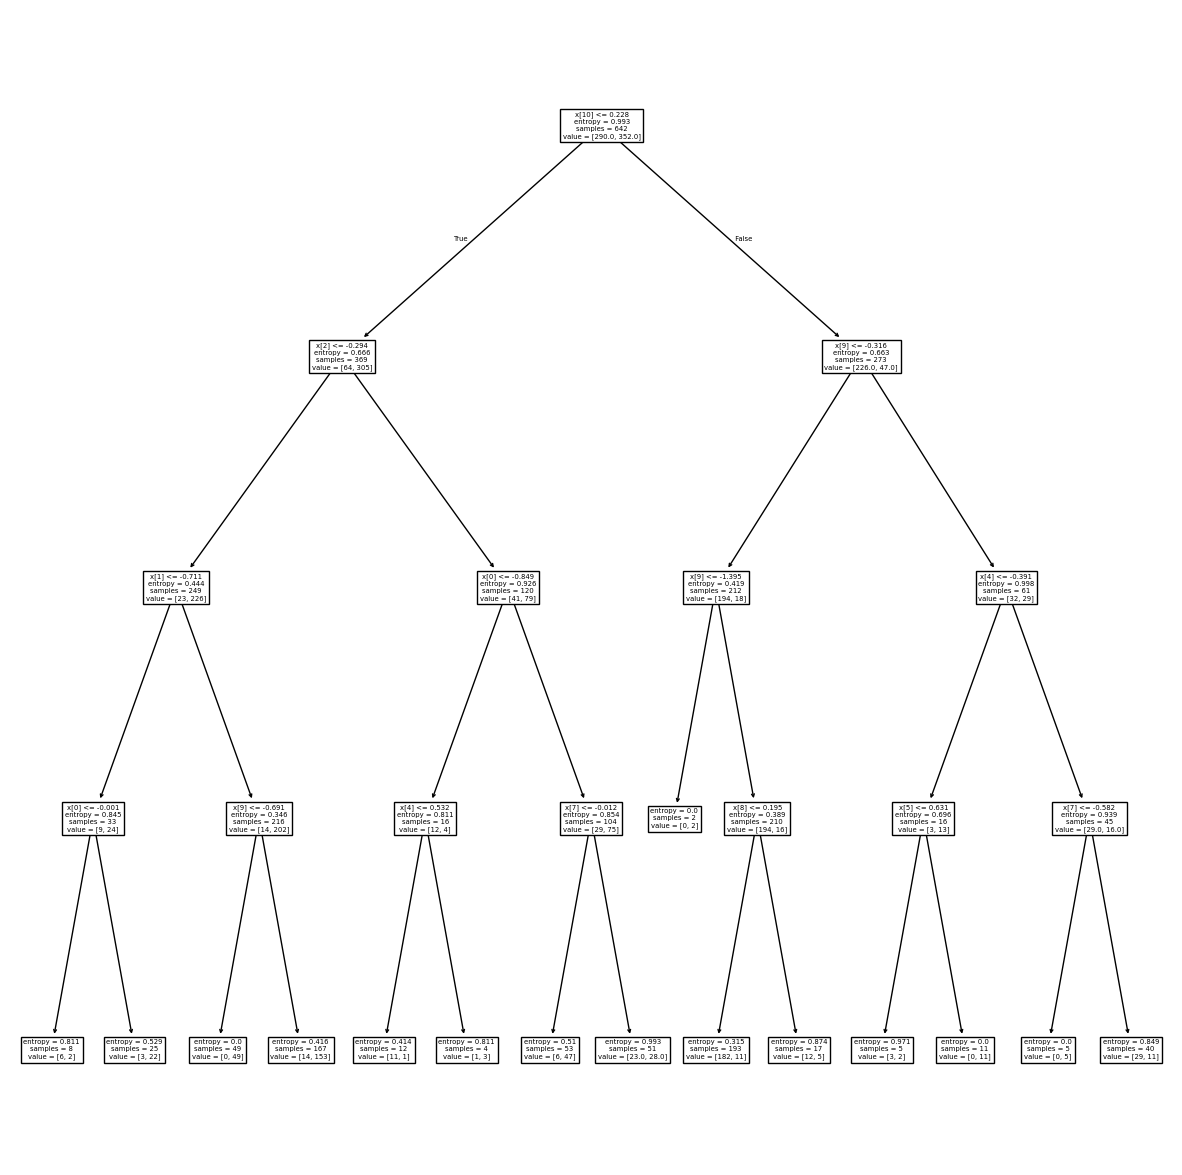

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(clf_new_tree)
plt.show()

**7.** Рассчитайте значение roc_auc_score

In [12]:
from sklearn.metrics import roc_auc_score

print(f"ROC AUC Test: {round(roc_auc_score(Y_test, Y_test_pred), 3)}")


ROC AUC Test: 0.785


**8.** Определите важность признаков.

In [13]:
features_imp = clf_new_tree.feature_importances_
for i in range(len(features_imp)):
    print(f"Feature {i}: {features_imp[i]}")


Feature 0: 0.05042852231386298
Feature 1: 0.02282671792337569
Feature 2: 0.06827000957733488
Feature 3: 0.0
Feature 4: 0.03524663576384518
Feature 5: 0.01805063969204051
Feature 6: 0.0
Feature 7: 0.05590050676763916
Feature 8: 0.016885425416099185
Feature 9: 0.12578229203796437
Feature 10: 0.6066092505078381


**8.** На основе процедуры бэггинга обучить композицию решающих деревьев, провести оптимизацию модели по гиперпараметру - кол-во деревьев в ансамбле. Использовать классы BaggingClassifier() и GridSearchCV(). Определить оптимальное кол-во деревьев и оценить точность модели.

In [14]:
from sklearn.ensemble import BaggingClassifier

list_param = {
    'n_estimators': range(1, 26),
    'max_features': range(1, 12)
}

gscv = GridSearchCV(BaggingClassifier(), param_grid=list_param, cv=5, scoring='accuracy')
gscv.fit(X_train, Y_train)

max_features = gscv.best_estimator_.max_features
n_estimators = gscv.best_estimator_.n_estimators

print(f"max_features: {max_features}")
print(f"n_estimators: {n_estimators}")
bc = BaggingClassifier(max_features=max_features, n_estimators=n_estimators)
bc.fit(X_train, Y_train)
Y_train_pred_bag = bc.predict(X_train)
Y_test_pred_bag = bc.predict(X_test)
print(f"Train accuracy: {round(accuracy_score(Y_train, Y_train_pred_bag), 3)}, Test accuracy: {round(accuracy_score(Y_test, Y_test_pred_bag), 3)}")

max_features: 8
n_estimators: 17
Train accuracy: 0.997, Test accuracy: 0.848


/Users/banana/university/3KURS/.venv/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**9.** Построить ансамбль решающих деревьев в виде случайного леса (см. класс sklearn.ensemble.RandomForestClassifier()), провести оптимизацию модели по гиперпараметрам: 'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'bootstrap'

In [15]:
from sklearn.ensemble import RandomForestClassifier

list_param = {
    'bootstrap': [True, False],
    'max_depth': [3,4,5,6,7,8,9,10,None],
    'min_samples_leaf': range(1,10), 
    'min_samples_split': range(2, 10), 
    'n_estimators': range(1, 16),
}

gscv = GridSearchCV(RandomForestClassifier(), param_grid=list_param, cv=5, scoring='accuracy')
gscv.fit(X_train, Y_train)

bootstrap = gscv.best_estimator_.bootstrap
max_depth = gscv.best_estimator_.max_depth
min_samples_leaf = gscv.best_estimator_.min_samples_leaf
min_samples_split = gscv.best_estimator_.min_samples_split
n_estimators = gscv.best_estimator_.n_estimators

print(f"bootstrap: {bootstrap}")
print(f"max_depth: {max_depth}")
print(f"min_samples_leaf: {min_samples_leaf}")
print(f"min_samples_split: {min_samples_split}")
print(f"n_estimators: {n_estimators}")


rfc = RandomForestClassifier(bootstrap=bootstrap, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_estimators=n_estimators)
rfc.fit(X_train, Y_train)
Y_train_pred_rf = rfc.predict(X_train)
Y_test_pred_rf = rfc.predict(X_test)
print(f"Train accuracy: {round(accuracy_score(Y_train, Y_train_pred_rf), 3)}, Test accuracy: {round(accuracy_score(Y_test, Y_test_pred_rf), 3)}")

bootstrap: False
max_depth: None
min_samples_leaf: 4
min_samples_split: 6
n_estimators: 11
Train accuracy: 0.952, Test accuracy: 0.851


**10.** Для всех моделей рассчитать метрики качества (accuracy, precision, recall, F1-score) на тестовой выборке. результат представить в виде датафрейма (например явняе индексы строк - вид модели, столбцы - вид метрики)

In [16]:
def score(y, y_pred):
    TP = TN = FP = FN = 0
    for i in range(len(y)):
        if y_pred[i] == y[i]:
            if y_pred[i] == 1:
                TP += 1
            else:
                TN += 1
        else:
            if y_pred[i] == 1:
                FP += 1
            else:
                FN += 1
    prec = TP / (TP + FP)
    rec = TP / (TP + FN)
    f1_score = (2 * prec * rec) / (prec + rec)
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    return prec, rec, f1_score, accuracy

prec_dt, rec_dt, f1_dt, accuracy_dt = score(np.array(Y_test), Y_test_pred_dt)
prec_bag, rec_bag, f1_bag, accuracy_bag = score(np.array(Y_test), Y_test_pred_bag)
prec_rf, rec_rf, f1_rf, accuracy_rf = score(np.array(Y_test), Y_test_pred_rf)
results_list = {
    "Accuracy": [accuracy_dt, accuracy_bag, accuracy_rf],
    "Precision": [prec_dt, prec_bag, prec_rf],
    "Recall": [rec_dt, rec_bag, rec_rf],
    "F1 score": [f1_dt, f1_bag, f1_rf]
}
indexes = ["Decision tree", "Bagging", "Random forest"]
results = pd.DataFrame(results_list, indexes)
results

Accuracy  Precision    Recall  F1 score
Decision tree  0.782609   0.824324  0.782051  0.802632
Bagging        0.847826   0.870130  0.858974  0.864516
Random forest  0.851449   0.857143  0.884615  0.870662